To run this notebook, refer to the README.md file in the root directory of this repository for installation instructions and other information.

# Problem statement
The function  employs a mathematical optimization model that integrates simulated transport data to define service regions for bike-sharing systems. The methodology follows these key steps:
1.	Input data pre-processing (for public transport network structure and user demand)
2.	Network building and assumptions, as explained in the model paper 
3.	Decision criteria model, includes different parameters like budget, investment costs, and operational efficiency, multimodal accessibility (to enhance the connectivity within the network), the framework penalizes suboptimal routes
4.	The output result is an optimized configuration of bike-sharing stations within the network. The bike inventory and capacity per station over different time periods is also provided

## 1. Input data and 2. Network building
The demonstrator creates the simulation data for the model. The network is built with the following configuration : 
- Grid 5 width, 5 height
- max of 2 shortest paths
- 100 user demand 

The `shared_mobility_network_optimizer` package contains the model algorithm with simulation data.

```py
from shared_mobility_network_optimizer import SharedMobilityNetworkOptimizer

model = SharedMobilityNetworkOptimizer()
model.build_network()
```

The `build_network()` function in the `SharedMobilityNetworkOptimizer` class creates a network and demand. 
Then the shortest paths for every trip demand within the network is calculated.

The calculated shortest paths are saved in a local file the first time, for cache purposes. 


## 3. Define the decision criteria
TODO: Refactor to define tunable decision criteria for the optimization model. This data will be passed to the `BikeSharingModel` class. 
```py
#TODO: create a decision criteria for the optimization model, for example
```

## 4. Run the model 
To run the model, run function `optimize()` in the `SharedMobilityNetworkOptimizer` class will create an instance of the optimization model, with the network, the shortest path solver, and the demand generator as input.

The optimization model is implemented with Gurobi. 

```py
model.optimize()
```

## 5. Visualize the results
The results of the model are saved in a local file. The  `plot()` function in the `SharedMobilityNetworkOptimizer` class can be used to visualize the results. 

```py
model.plot()
```

# Future work 
- reorganize output data result folder for more clarify and tracking on simulations runned 
- The model decision variables will be refactored to use the decision criteria as dynamic parameters
- The data visualization will be improved, with more dynamic plots and using hexagonal presentation for the grid. We will use LeafLet in an HTML/JS page, to visualize the data in a more interactive way.
- The model will be executed with Geneva Living Lab data, a new demo script will be created for this purpose.




📦 Preprocessing data
🌐 Constructing transport network
Grid center walks to userOD processed: 12 arcs added.

Grid center walks to bikeStation processed: 33 arcs added.

Grid center walks to publicTransportStop processed: 0 arcs added.

PT stop walks to bike stations processed: 9 arcs added.

Biking processed: 27 arcs added.

Node: 
  - userOD: 9
  - bikeStation: 9

 Arc:
  - Walk: 102
  - Bike: 54
  - PT_1: 6
🚦 Solving shortest paths


Processing user OD nodes: 100%|██████████| 9/9 [00:00<00:00, 13.92it/s]

Quantity of multi-modal trips:
  - {'Bike', 'Walk'}: 48
  - {'PT_1', 'Bike', 'Walk'}: 22
  - {'PT_1', 'Walk'}: 12
------------------
Proportion of disconnected OD pairs: 0.0000
------------------
✅ The shortest path calculation is complete and has been stored in the cache file!
🧠 Running optimization model
Restricted license - for non-production use only - expires 2026-11-23
=== Sets Initialization Completed ===
Total OD pairs (K): 82
Total Bike Stations (B): 9
=== Parameters Initialization Completed ===
Start setting variables
=== Variables Initialization Completed ===
=== Objectives Initialization Completed ===
=== Constraints Initialization Completed ===
Final total constraints count: 0
Set parameter TimeLimit to value 3600
Set parameter Method to value 3


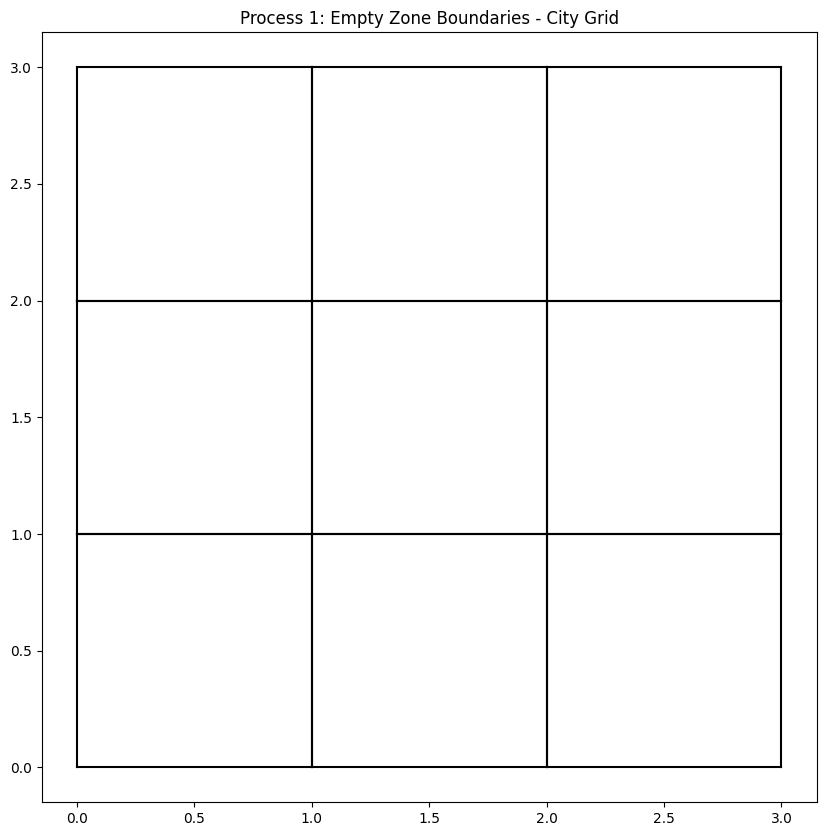

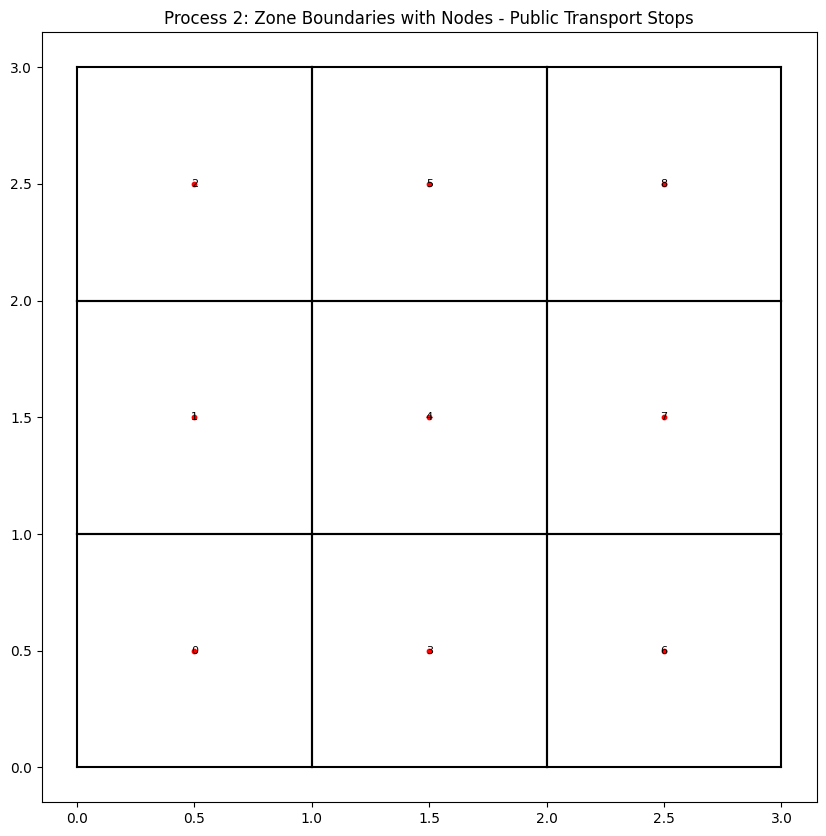

---------------------------
Statistics for model 'NetworkDesign':
  Problem type                : MIP
  Linear constraint matrix    : 450 rows, 570 columns, 1860 nonzeros
  Variable types              : 0 continuous, 570 integer (105 binary)
  Matrix range                : [1e+00, 4e+02]
  Objective range             : [8e-01, 9e-01]
  Bounds range                : [1e+00, 3e+01]
  RHS range                   : [1e+00, 2e+04]
---------------------------
✅ Gurobi 结果已保存到 gurobi_results_3*3_20250428_121906.json

✅ 选定的站点（y=1）及其初始库存 v 和容量 z：
🚲 站点 Node(BS-0, coordinate=(0.5, 0.5), is_origin=False, : y = 1.0, v(initial inventory) = 18.0, z(capacity) = 30.0
🚲 站点 Node(BS-1, coordinate=(0.5, 1.5), is_origin=False, : y = 1.0, v(initial inventory) = 30.0, z(capacity) = 30.0
🚲 站点 Node(BS-2, coordinate=(0.5, 2.5), is_origin=False, : y = 1.0, v(initial inventory) = 25.0, z(capacity) = 30.0
🚲 站点 Node(BS-5, coordinate=(1.5, 2.5), is_origin=False, : y = 1.0, v(initial inventory) = 10.0, z(capacity) = 30

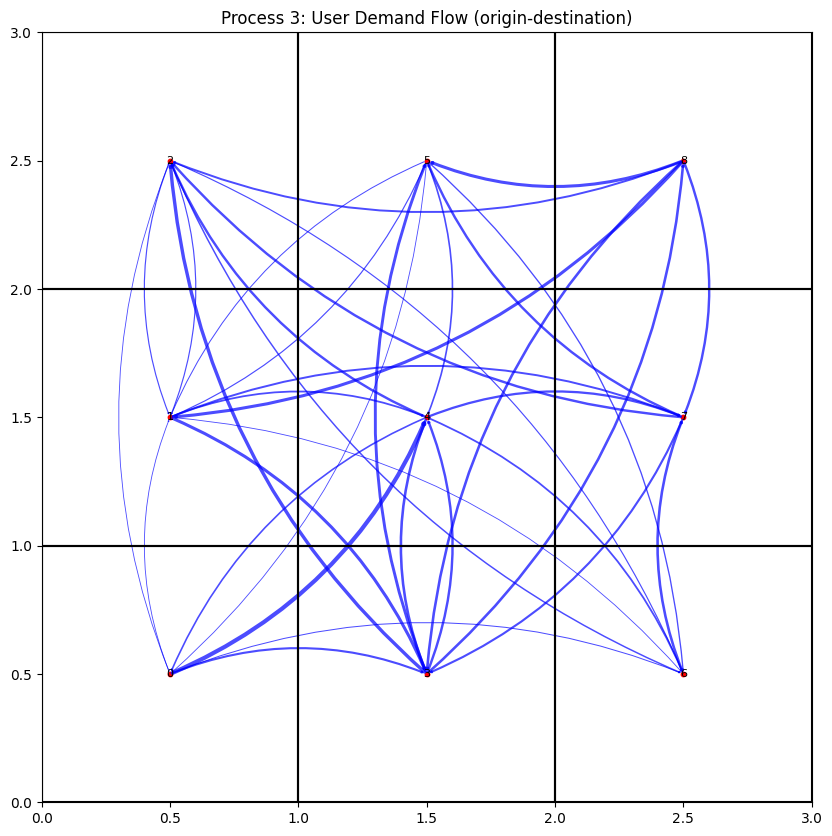

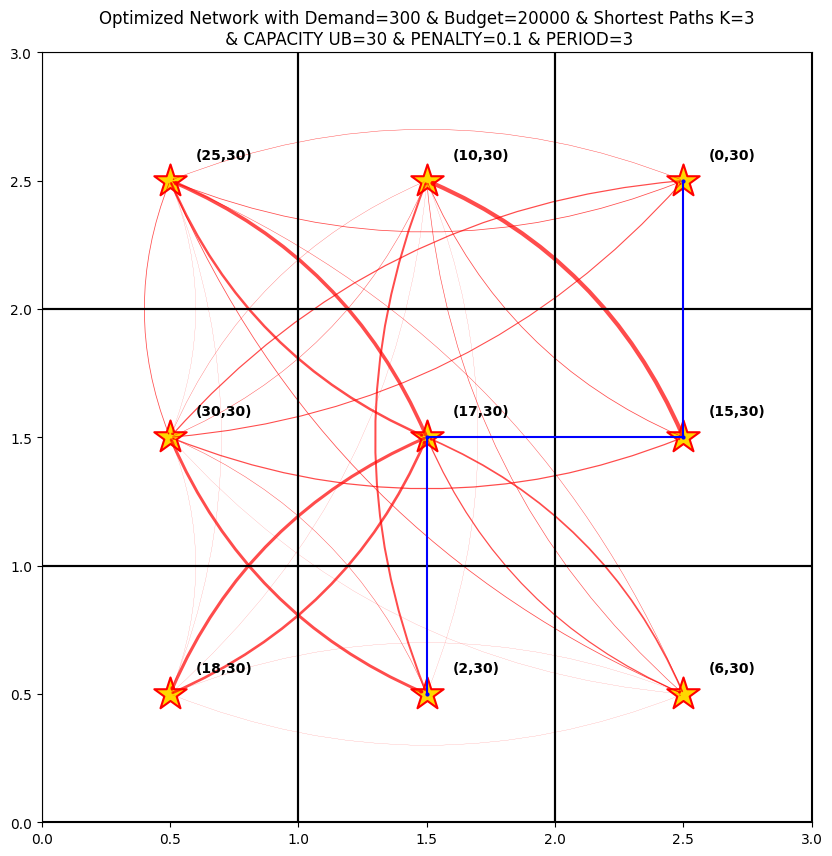

In [1]:
from shared_mobility_network_optimizer import SharedMobilityNetworkOptimizer

model = SharedMobilityNetworkOptimizer()

model.build_network()
model.optimize()
model.plot()
